In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append('/home/user/deep-learning/')
sys.path.append('/home/gbaasch/projects/def-revins/gbaasch/deep-learning')
sys.path.append('../../methods')

In [3]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from fastai.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd

from BlackBoxMethod import ResNet, BasicBlock, RNNRegression
from BuildingDataset import BuildingDataset, DataBunch, get_dls

from training.exp.learner import Learner
from training.exp.runner import prep_run_vanilla, prep_one_cycle
# from datahandlers.exp.basic_databunch import DataBunch, get_dls

# Params for papermill

In [4]:
# this cell is tagged `parameters`
label_idx   = 5 
network     = 'cnn'
run_count   = 1
train_fname = '../../hdf5/train.hdf5'
valid_fname  = '../../hdf5/test.hdf5'

In [5]:
# Parameters
network = "cnn"
label_idx = 0
train_fname = "../../hdf5/train.hdf5"
valid_fname = "../../hdf5/test.hdf5"


In [6]:
save_name = str(label_idx) + '_' + network + '_' + str(run_count)

In [7]:
label_idx, network, run_count, save_name

(0, 'cnn', 1, '0_cnn_1')

# Prep Data

In [8]:
# train_fname, valid_fname = 'train.hdf5', 'test.hdf5'
batch_size = 100

train_ds = BuildingDataset(train_fname, label_idx)
valid_ds = BuildingDataset(valid_fname, label_idx)

len(train_ds), len(valid_ds)

data = DataBunch(*get_dls(train_ds, valid_ds, batch_size))
data.train_ds[0][0].shape

torch.Size([2000, 4])

# Train

In [9]:
use_gpu = True

def run_model(model, opt, db, lr=0.01, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_run_vanilla(metrics, use_cuda=use_gpu)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

def run_model_one_cycle(model, opt, db, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_one_cycle(use_cuda=use_gpu, metrics=metrics, min_lr=0.00001, max_lr=0.001)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

In [10]:
def resnet(ni, **kwargs):
    model = ResNet(ni, BasicBlock, [3, 4, 6, 3, 3], **kwargs)
    return model

In [11]:
if network == 'cnn':
    model = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    model = RNNRegression(ni=4)
    
opt = torch.optim.Adam(model.parameters())

epoch      train loss          valid loss     root_mean_squared_error
0          2271.0906           2119.7295             46.023       


1          2103.0734           2015.0925            44.8787       


2          2012.7575           1945.0652            44.0965       


3          1947.0463           1877.2451            43.3216       


4          1886.4635            1833.62             42.8174       


5          1820.9616           1748.9485             41.818       


6          1743.3685           1680.1695            40.9874       


7          1650.1058           1568.9381            39.6052       


8          1537.9906            1441.072            37.9534       


9          1403.5993           1332.4884            36.4987       


10         1247.9162            1166.927            34.1496       


11         1072.1724            985.3192             31.37        


12          881.3882            752.4324             27.414       


13          682.7022            548.4277            23.3897       


14          474.0358            357.5278            18.8834       


15          286.7389            290.7711            16.9385       


16          149.1332            127.956             11.2108       


17          61.3171              52.934              7.2076       


18          20.8527             18.0284              3.5882       


19           6.2088             13.7409              3.4864       


20           2.7295              1.6461              1.2246       


21           2.1969              4.0678              1.9206       


22           1.8869              0.6369              0.7758       


23           1.6979              1.4899              1.1468       


24           1.8676             10.4538              3.0826       


25           2.1231              1.6107              1.2246       


26           1.2767             38.7101              5.2528       


27           1.9466              2.1176              1.4224       


28           1.7678              3.8614              1.9242       


29           1.769               0.5891              0.7475       


30           1.5137             48.3333              5.6374       


31           2.1024              4.3877              1.9685       


32           1.6348             22.1634              4.4204       


33           3.6223             20.9221              4.3319       


34           2.1785              2.4226              1.4208       


35           1.6764             13.0539              3.1092       


36           1.4254              1.0152              0.9801       


37           1.4946             29.3729              4.4688       


38           2.5661              6.926               2.5752       


39           1.8675              3.5148              1.5632       


40           1.3645              6.0154              2.2495       


41           1.4662              2.8439              1.6753       


42            1.22               8.6549              2.6927       


43           1.5338             21.5727              3.7964       


44           1.5586             15.6026              3.5424       


45           1.3924              1.8643              1.2421       


46           1.3135             33.0962              5.1266       


47           1.8666              1.357               1.089        


48           1.3533              3.1431              1.676        


49           1.4165              1.2987              1.1189       


50           1.2121             23.9068              4.1189       


51           1.3332             26.5561              4.6321       


52           1.2179             17.6028              3.4606       


53           1.1378              4.4101              2.0983       


54           1.2105              9.9687              3.0423       


55           1.3447              1.4937              1.2064       


56           1.3871              2.4465              1.3832       


57           1.3426             67.4067              7.2943       


58           1.1651             29.3969              5.0329       


59           1.1423              1.7594              1.2733       


60           1.1621              8.1442              2.5903       


61           1.2973              0.5057              0.6975       


62           1.427              32.0244              5.0861       


63           1.5951             26.9775              4.6103       


64           1.3205             44.0333              5.8508       


65           1.2846              6.5579              2.2468       


66           1.2759             13.3285              3.0893       


67           1.2827             12.7558              3.0415       


68           1.1218             23.9544              4.6055       


69           1.3565             20.9595              4.0403       


70           1.1651              0.8685              0.9077       


71           1.2814              4.0413              1.9004       


72           1.2125              3.8075              1.9078       


73           1.1261              1.9078              1.3013       


74           1.0926             25.0846              4.8554       


75           2.2977             11.8045              3.1221       


76           1.4455              2.0823              1.3186       


77           1.2673              1.0934              1.0157       


78           1.1934              5.1865              2.1683       


79           1.1439             16.4483              3.526        


80           1.1931             14.9478              3.5537       


81           1.2302             25.4774              4.1834       


82           1.1379              1.7267              1.2842       


83           1.3049             16.8978              3.6531       


84           1.2559             20.1111              3.6651       


85           0.9548              7.3615              2.4098       


86           1.0515              3.5632              1.8583       


87           1.2533              1.5404              1.2088       


88           1.8929              14.01               3.1764       


89           1.1018              0.6361              0.7861       


90           1.1919             18.6374              3.8361       


91           0.9712              0.7296              0.8473       


92           1.321              25.2657              4.6705       


93           1.1885              8.7733               2.77        


94           1.0746             16.1974              3.7523       


95           0.8645              2.2784              1.4616       


96           1.0339              2.0724              1.3661       


97           1.0179              0.6848              0.8039       


98           0.8256             34.7547              5.0675       


99           1.025              40.7738              5.705        


100          0.9134              6.176               2.3926       


101          0.9313              3.1258              1.5825       


102          0.9986              1.3048              1.0358       


103          0.9983              7.3665              2.632        


104          0.9459              0.6437              0.7716       


105          0.9631              0.8037              0.8643       


106          0.8375              3.5434              1.6841       


107          0.9413              1.2959              1.0633       


108          0.9715              0.6047              0.7709       


109          0.8757              3.2491              1.5595       


110          0.8627              6.1599              2.1513       


111          0.9067             10.4089              2.8004       


112          0.839               0.7537              0.8088       


113          0.8319              0.2926              0.5351       


114          0.7753              1.1761              1.0606       


115          0.7602              1.4653              1.1667       


116          0.8842             37.0869              5.3573       


117          0.9367              4.5076              1.8281       


118          0.6579              3.1372              1.6493       


119          0.7855             28.2269              4.6142       


120          0.8026              3.0629              1.641        


121          0.8699             57.5662               6.67        


122          0.8829             19.2452              3.7614       


123          0.7187              2.154               1.3123       


124          0.7207              1.5283              1.148        


125          0.6653              1.6274              1.1827       


126          0.6997             22.4822              3.8809       


127          0.7158             17.9894              3.7835       


128          0.7865              0.8397              0.8967       


129          0.764                3.63               1.8511       


130          0.6996              1.0232              1.0065       


131          0.714               1.7117              1.2186       


132          0.5612              1.4835              1.1559       


133          0.6271              2.1402              1.2974       


134          0.5981              1.5806              1.2207       


135          0.7066              1.7573              1.1844       


136          0.4994              1.8841              1.3125       


137          0.4736              2.159               1.4543       


138          0.5674              0.7078              0.8012       


139          0.5276             13.6685              3.0632       


140          0.5876              8.0982              2.5593       


141          0.4996              0.4255              0.6306       


142          0.5217              3.6954              1.896        


143          0.5487               0.91               0.9123       


144          0.5279              1.2139              1.0802       


145          0.5515              0.4673              0.6694       


146          0.4968              4.2479              1.7898       


147          0.4988              6.1737              2.4231       


148          0.6078              2.0509              1.3648       


149          0.476               0.3472              0.5851       


150          0.4957              0.8639              0.9188       


151          0.5008              0.3027              0.544        


152          0.545               4.2644              1.7884       


153          0.4565              3.5975              1.6335       


154          0.4676              0.792               0.8436       


155          0.4321              0.8672              0.9122       


156          0.4325               1.21               1.0145       


157          0.4087              4.6728              1.9398       


158          0.4253              0.7215              0.8422       


159          0.4159              1.7077              1.2811       


160          0.3849              0.4901              0.6889       


161          0.3614              0.5178              0.6845       


162          0.3919              3.0437               1.73        


163          0.3881              0.6211              0.7574       


164          0.3457              0.426               0.6317       


165          0.3396              0.7719              0.8571       


166          0.3361              1.0231              0.9657       


167          0.3193              0.2227              0.4673       


168          0.3397              0.4242              0.6312       


169          0.3572              0.285               0.528        


170          0.323               1.0048              0.945        


171          0.3348              0.7693              0.8335       


172          0.2916              0.898               0.9281       


173          0.2905              0.2638              0.5083       


174          0.2777              2.4147              1.4183       


175          0.2933              1.8475              1.281        


176          0.3131              0.8567              0.8883       


177          0.3122              0.9607              0.9527       


178          0.3151               0.35               0.585        


179          0.2641              0.3402              0.5733       


180          0.2826              0.8959              0.9413       


181           0.25               0.6328              0.758        


182          0.2592              0.8739              0.9195       


183          0.2633              0.389               0.6199       


184          0.2508              0.4314              0.6385       


185          0.2652              0.4911              0.6914       


186          0.2881              0.3456              0.5761       


187          0.2556              0.3611              0.5884       


188          0.2442              0.9181              0.9519       


189          0.2573              0.2532              0.4989       


190          0.2569              0.321               0.5627       


191          0.2373              0.3792              0.6026       


192          0.2247              0.309               0.5507       


193          0.2411              0.4173              0.6422       


194          0.2374              0.2991              0.5414       


195          0.2156              0.2496              0.4941       


196          0.2437              0.483               0.6914       


197          0.251               0.6755              0.7858       


198          0.2469              0.7587              0.8591       


199          0.2538              0.4475              0.6615       


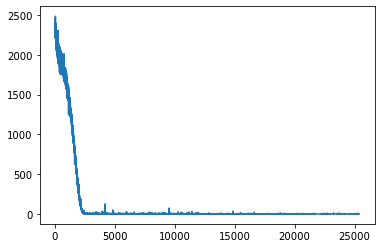

In [12]:
learner = run_model_one_cycle(model, opt, data, epochs=200)

# Predict

In [13]:
# mpath = f'models/cnn_inf' 
mpath = os.path.join('models', save_name)

In [14]:
torch.save(model.state_dict(), mpath) 

In [15]:
state = torch.load(mpath)
if network == 'cnn':
    m = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    m = RNNRegression(ni=4)

ml = m.cuda()
ml.load_state_dict(state)
ml.eval();

In [16]:
del model
torch.cuda.empty_cache()

In [17]:
valid_preds = ml(data.valid_dl.x.cuda()) 

### Predict Train

In [18]:
# plt.scatter(data.train_dl.y, train_preds.tolist());
# plt.plot(data.train_dl.y, data.train_dl.y);
# plt.grid()

### Predict Valid

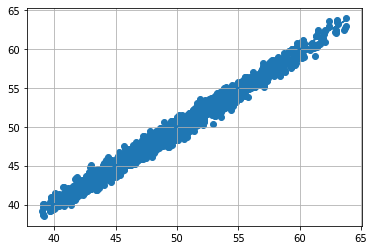

In [19]:
plt.scatter(data.valid_dl.y, valid_preds.tolist());
plt.plot(data.valid_dl.y, data.valid_dl.y);
plt.grid()

# Predict each case

In [20]:
cases_no_infiltration = [
    ('victoria', 'control_concrete', 'False'),
    ('victoria', 'control_concrete', 'True'),
    ('victoria', 'control_wood', 'False'),
    ('victoria', 'control_wood', 'True'),
    ('chicago', 'control_concrete', 'False'),
    ('chicago', 'control_concrete', 'True'),
    ('chicago', 'control_wood', 'False'),
    ('chicago', 'control_wood', 'True'),
    ('victoria', 'control_concrete_inf', 'False'),
    ('victoria', 'control_concrete_inf', 'True'),
    ('victoria', 'control_wood_inf', 'False'),
    ('victoria', 'control_wood_inf', 'True'),
    ('chicago', 'control_concrete_inf', 'False'),
    ('chicago', 'control_concrete_inf', 'True'),
    ('chicago', 'control_wood_inf', 'False'),
    ('chicago', 'control_wood_inf', 'True')
]

In [21]:
def case_string(case):
    case_name = ''
    for c in case:
        case_name += c #+ '\n'
    return case_name

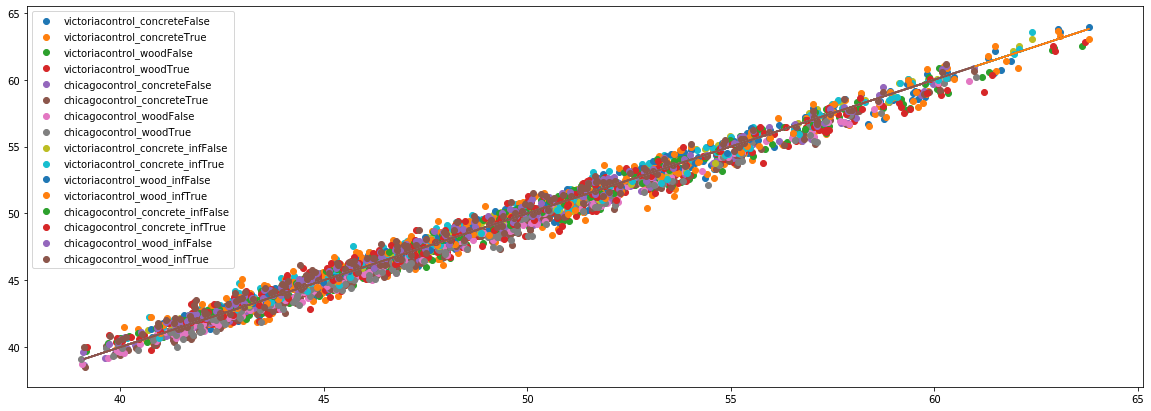

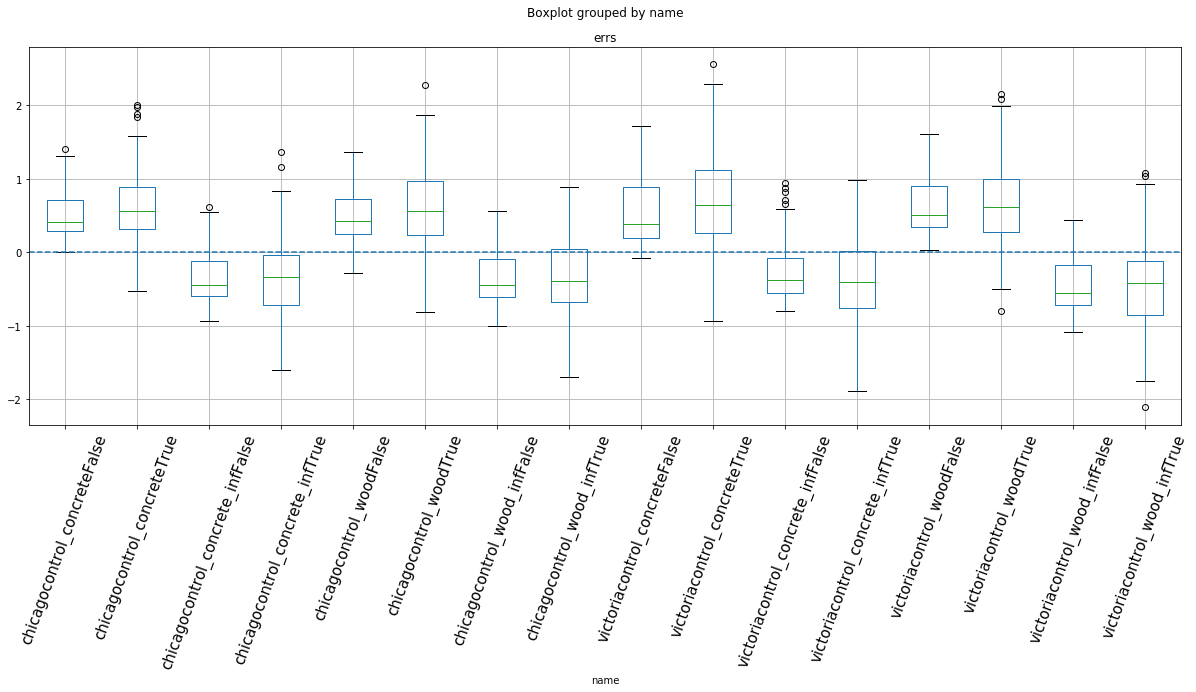

In [22]:
df_errs_all = pd.DataFrame()

plt.figure(figsize=(20,7))

for case in cases_no_infiltration:
    x, y = data.valid_dl.get_by_metadata(list(case))
    preds = ml(x.cuda()) 
    case_name = case_string(case)
    plt.scatter(y, preds.tolist(), label=case_name);
    plt.plot(y, y);
    plt.grid()
#     plt.show()
    df_errors = pd.DataFrame()
    df_errors['errs'] = y.sub(preds.to("cpu")).tolist()
    df_errors['name'] = case_name
    df_errs_all = df_errs_all.append(df_errors)
plt.legend()
plt.show()  

df_errs_all.boxplot(column='errs', by='name', figsize=(20, 7))
plt.axhline(0, 0, 1, label='No Error', linestyle='--')
plt.xticks(rotation=70, fontsize=15);